# **Analytics for the Public Good**
> **Group Members**: Anna Jackson, Ryan Young, Connor McWilliams, Sonia Romero, Brett Boos <br>
> **Date**: Spring Quarter 2022 <br>
> **Class**: INFO 3500 Capstone/Senior Project <br>

## **Packages:**

## **Table of Contents<a id="Top"></a>**
1. [Preperation, Framing, Understanding](#1) <br>
    a. [Focus](#1a) <br>
    b. [Questions](#1b) <br>
    c. [Data Collection](#1c) <br>
    d. [Business Understanding](#1d) <br>
    e. [Data Understanding](#1e) <br>
2. [Immersion, Data Preperation, Modeling](#2) <br>
    a. [Hypotheses](#2a) <br>
    b. [Variables](#2b) <br>
    c. [Data Preperation and Integration](#2c) <br>
    d. [Analytic Techniques](#2d) <br>
3. [Incubation, Analysis, Evaluation](#3) <br>
    a. [Importing Data](#3a) <br>
    b. [Descriptive Analysis](#3b) <br>
    c. [Multilinear Regression](#3c)<br>
    d. [Clustering](#3d) <br>
4. [Findings and Recommendations](#4) <br>

### **Preperation, Framing, Understanding**  <a id='1'></a>

### _Focus:_ <a id='1a'></a>
> From the original crime dataset, we are exploring the age range of K-12 (where age < 19) for insight on what type of crimes this age group commits (offense category name) along with where (county name) and when (incident date, incident hour) these crimes occur. We will then tie in various outside data sources in order to apply intricate reasoning and rationale behind the “why”, “where” and “when” these crimes occur by this age range.  

### _Questions:_ <a id='1b'></a>
> **Based on original crime data (Crimes in Colorado):**
> 1. Is there a common set of crimes that our defined age range is committing? 
> 2. Does seasonality play a part in where the crimes are more likely to occur by our defined age range? (e.g., are crimes more likely to occur in the summer months when school is out?) 
> 3. Which district possesses the highest/lowest crime rates by our defined age range? 

> **Based on the District Student Mobility/Stability Statistics data:**
> 1. Do districts that see a higher/lower mobility rate also see a higher/lower crime rate by our defined age range?  
> 2. Do districts with a higher/lower gifted and talented student population also see higher/lower crime rates by our defined age range? What about migrant students, disabled students, English learners, homeless students, or economically disadvantaged student populations? 

### _Data Collection:_ <a id='1c'></a>
> Data has been collected from the state of Colorado using Socrata's API's data.colorado.gov/ endpoint. <br>

> **Crimes in Colorado:**
At the core of our analysis, we will be using the 2016-2019 crime data that was given to us in our capstone class. Additionally, we will use the 1997-2015 version of that same data to better understand changes and patterns over time. <br>

> **District Mobilit/Stabilit Statistics for 2011-2012:**
This dataset will be used to answer questions about student homelessness and other student populations (noted below) from the 2011-2012 school year. This 184-row dataset is aggregated by school year and school district and includes rows for state totals. It contains 60 columns, with aggregations on pupil count, stable student count, stability, mobility, instances for mobility, and mobility incidence for the following student populations: students with disabilities, English language learners, economically disadvantaged, migrant students, title 1 students, homeless students, and gifted & talented students.  

> **Other datasets:**
We used six other crime datasets, six other education datasets, and four general datasets that are explained in detail in status report 1 to further explain the trends in crime. 

### _Business Understanding:_ <a id='1d'></a>
> The business purpose of our project is to equip the Colorado State Police Department with brand new key information on the “why”, “when” and “where” crimes that are occurring by our defined age range (K-12 students) for them to enact mitigation and prevention strategies in order to preserve the safety of Colorado residents.

### _Data Understanding:_ <a id='1e'></a>
> **Combined Crime Data 1997-2019:** <br> 
> Brief Data Exploration:
> 1. 6,770,666 total rows (**825,767** total rows where age < 19 (12.19%))
> 2. Most crimes occur in **Arapahoe** (131,439) and least in **Kiowa** (21)
> 3. Most frequent crime offenses are **larceny/theft offenses** (214,962) and least **human trafficking** (4)
> 4. Most frequent hour crime occurs is **3:00pm** (56,945) and least is **5:00am** (4,861)
> 5. Most frequently the crime was against **property** (444, 841) and least **not a crime** (3)
> 6. Most frequent date crimes occured on **2016-10-02** (576) and least crimes occured on was **Christmas** most years

> **District Student Mobility/Stability  Statistics Data:** <br> 
> Brief Data Exploration: 
> School districts averaged: <br>
> - **Total students**: <br>
> 5,133 total students, 3,853  stable students, 1,266 mobile students  <br>
> - **Disabled students**:<br>
> 460 total** students, 358 disabled stable students, 100 mobile students <br>
> - **English Learning Students:** <br>
> 742 total students, 556 stable students, 184 mobile students  <br>
> - **Economically Disadvantaged Students:** <br>
> 2,021 total students, 1,497 stable students, 514 mobile students <br>
> - **Migrant Students:** <br> 
> 15 total students, 9 stable students, 5 mobile students <br>
> - **Title 1 Students:** <br>
> 1,219 total students, 857 stable students, 353 mobile students <br> 
> - **Homeless Students:** <br>
> 117 total students, 62 stable students, 53 mobile students <br>
> - **Gifted & Talented Students:** <br>
> 401 total students, 364 stable students, 36 mobile students <br>

### **Immersion, Data Preperation, Modeling**  <a id='2'></a>

### _Hypotheses:_ <a id='2a'></a>
> Central to our research will be a linear regression model that predicts crime rate for an area based on its demographics and school systems. Additionally, we intend to conduct clustering analyses to group counties together based on factors that might necessitate different approaches or strategies of law enforcement, though it’s unclear what those factors will be. The hypotheses below highlight our predictions on how certain variables will contribute to the success of our model. 

> **Education:** 
> - Student stability rate will significantly, negatively, predict certain types of crime, such as violence and gang-related activity. 
> - The percentage of adults in a county who don’t have a high school diploma should significantly predict crime rates. 
> - The percentage of grade-school-enrolled students who are in grades 9-12 should significantly predict crime rates; when the number of high-school students falls below the expected mean for a county, this indicates a higher rate of students dropping out, which may predict crime. 
> - Mobility/stability rates of economically disadvantaged students might be able to explain cases in which a county has lower crime rates than expected/predicted by our models. In poor areas, an unexpectedly high stability rate might indicate that the school system or local government has been effective in giving disadvantaged students the support they need to succeed. It’s possible that mobility/stability rates will be mostly dependent upon population density (less mobility in rural areas), so we may need to alter the mobility rates to correct for population density. 

> **Demographics:** <br>
> - The ratio of number of households to total population in a county will significantly predict crime rates. A lower number of households might indicate higher rates of drug-related crimes and homelessness. 
> - The standard deviation of owner-occupied housing unit prices may significantly predict crime. If so, this might be due to a variety of reasons, such as police forces favoring higher-income areas within a county and neglecting others. 
> - The percentage of vacant housing units in a county should significantly predict certain types of crime, such as violence or drug use. 
> - The percentage of U.S. born, out-of-state, residents should negatively predict crime rates in an area, as this is a sign of tourism. 
> - The percentage of owner-occupied housing units which are valued at less than $50,000 should predict crime in an area. 
> - The percentage of below-poverty-line residents who are under the age of 18 may significantly predict certain types of crime, such as violence or gang-related activities.

### _Variables:_ <a id='2b'></a>
> We aim to focus on crime at the county level. A county column has been created for all datasets which did not have one (converted police district to county, and school district to county). <br>
> **Targets:** <br>
> - Predict overall crime rate, given a county 
> - Predict crime rate for each category of crime, given a county 
> - Predict juvenile crime rate, given a county 
> - Datasets: Crimes in Colorado, Crime Arrests, Crime Offenses 
> **Predictors:** <br>
> - County demographics (33 of 157 continuous columns selected) 
> - Crime demographics – age, gender, year (from crime datasets above) 
> - Education demographics – (enrollment, graduation, mobility, stability) 
> - Additional Datasets: Student Mobility/Stability Statistics, Graduation Data, and Census Counties in Colorado

### _Data Preperation and Integration:_ <a id='2c'></a>
> Standardizing the geographic location granularity across all datasets was the biggest technical challenge in our data preparation. In their raw form, not a single pair of datasets could be merged, nor could comparisons be made across groups. Each dataset was indexed by either county, or a district-related field, but naming conventions for such fields were not standardized. The following steps were taken to ensure that each dataset could be aggregated by county: <br> 
> **Standardize and combine crime records across 97-15 data and 16-19 data**
> - County naming conventions differed across datasets. The old crime data used primary_county, whereas the new data included both the primary and secondary county in a single string. These were modified to remove the secondary county. 
> - Police department naming conventions differed across datasets. These were standardized. 
> - Crime data from State Patrol and Colorado Bureau of Investigation were removed. 
> - The 97-15 and 16-19 crime datasets were concatenated into a single table. <br>
> **Add county to the aggregate crime rate datasets (Crime Arrests, Crime Offenses)**
> - Unique police departments and counties were retrieved from crime records from the previous step, to use for string matching. 
> - The two aggregated crime datasets have different naming conventions for police department, so they were first modified to use the same names as each other and were further modified to use the same names as the crime records data from the previous step. 
> - Finally, the county column was merged in. <br>
> **Add county to education datasets (Student Mobility, Graduation Rate)**
> - The Student Mobility data does not provide a county column, but the Graduation Rate data does. This column was merged into the Student Mobility data. <br>
>**Pivot and aggregate the County Population dataset**
> - This dataset has nearly 400,000 rows despite being aggregated already. It offers a separate row for each individual age, for each county, for each year. First, the data was aggregated into two age groups (minor, adult). 
> - Next, the age range column was eliminated, and the data was pivoted to be indexed by county and year to remove redundancy. <br>
>**Pivot and aggregate the County Population dataset**
> - The census data contains roughly 150 variables. We selected the 33 variables which seemed most useful. The Census Field Descriptions dataset from Socrata was used to interpret variables. 
> - The 8 columns for race were reduced to: hispanic, white, black, other. 
> - Housing price distributions were described by 11 bins. We reduced these to 6 bins. 

### _Analytic Techniques:_ <a id='2d'></a>
> **Descriptive Analysis:**
> Once the data has been prepared, we will create an initial set of visualizations to better understand the data. This will include correlation matrices, histograms, and time series plots. Additional visualizations will be created once the research is complete, to communicate key findings. <br>
> **Multilinear Regression:**
> We aim to predict the overall crime rate in an area based on education and census data. In a practical setting, this model is intended to be used when future predictions have been made about general statistics/demographics in an area (i.e. estimated population growth, etc.), and a prediction must be made for how crime rates will respond to such changes. <br>
> **Clustering:**
> In addition to forecasting and predictions, it’s also desirable to create models that help law enforcers better understand what makes their area/county different. Therefore, we intend to create one or more clustering analyses to place counties into categories that differ in ways that are most meaningful to local police departments. For instance, in each cluster, law enforcement agencies might wish to take different approaches to the following: who to hire, where to direct manpower, how to charge violators in certain situations, how to interpret risk in certain situations, effective scheduling, etc. 

### **Incubation, Analysis, Evaluation**  <a id='3'></a>

### _Importing Data:_   <a id='3a'></a>

In [87]:
# !pip install chart-tools
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import chart_tools as ct
import scipy.stats as stats
from itertools import combinations
from sklearn import metrics, tree
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.inspection import permutation_importance
from yellowbrick.regressor import ResidualsPlot
import chart_tools as ct
import statsmodels.api as sm

pd.set_option('display.max_rows', 200)

In [88]:
# Import aggregated crime data 
df_agg_cat = pd.read_csv(r'../prepared_data/crime_records/output/crime_agg_category.csv')
df_education = pd.read_csv(r'../prepared_data/combined/output/all_education_rates.csv', index_col=0)
df_demographic = pd.read_csv(r'../prepared_data/combined/output/county_stats_normalized.csv', index_col=0)
display(df_agg_cat, df_education, df_demographic)

,year,county,count,age_avg,quarter_mode,month_mode,day_of_week_mode,hour_mode,against_person,against_property,...,kidnapping,larceny_theft,porn,property_damage,prostitution,robbery,sex_offense,stolen_property,vehicle_theft,weapon_law
0,1997,ADAMS,22947,24.582071,1.0,3.0,0.0,17.0,3047.0,17766.0,...,50.0,8023.0,1.0,5467.0,14.0,189.0,316.0,245.0,1317.0,274.0
1,1997,ALAMOSA,404,27.098901,3.0,8.0,5.0,18.0,101.0,264.0,...,0.0,165.0,0.0,73.0,0.0,0.0,9.0,0.0,6.0,4.0
2,1997,ARAPAHOE,37555,25.209156,3.0,8.0,4.0,18.0,4568.0,28573.0,...,249.0,14345.0,0.0,5856.0,198.0,238.0,434.0,421.0,2537.0,695.0
3,1997,ARCHULETA,578,23.603053,4.0,10.0,4.0,9.0,24.0,487.0,...,1.0,291.0,0.0,129.0,0.0,0.0,6.0,0.0,10.0,10.0
4,1997,BACA,49,22.461538,1.0,1.0,2.0,11.0,1.0,48.0,...,0.0,19.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1392,2019,SUMMIT,1872,30.943361,1.0,1.0,5.0,12.0,330.0,1450.0,...,21.0,624.0,8.0,267.0,3.0,3.0,34.0,3.0,30.0,7.0
1393,2019,TELLER,856,35.404007,2.0,4.0,1.0,0.0,162.0,465.0,...,5.0,206.0,3.0,118.0,0.0,0.0,4.0,9.0,11.0,33.0
1394,2019,WASHINGTON,217,35.098592,4.0,1.0,1.0,0.0,49.0,162.0,...,0.0,79.0,0.0,29.0,0.0,1.0,0.0,0.0,21.0,0.0
1395,2019,WELD,26371,30.307070,3.0,9.0,4.0,0.0,4828.0,17291.0,...,193.0,7992.0,94.0,3349.0,8.0,218.0,572.0,175.0,1536.0,410.0


,county,stable_rate,mobile_rate,mobile_instances_rate,disabled_stable_rate,disabled_mobile_rate,disabled_mobile_instances_rate,disabled_graduated_rate,disabled_completed_rate,limited_eng_stable_rate,...,black_pupil_total,hispanic_pupil_total,white_pupil_total,disabled_grad_base_total,limited_eng_grad_base_total,poor_grad_base_total,migrant_grad_base_total,title_1_grad_base_total,homeless_grad_base_total,gifted_grad_base_total
0,ADAMS,68.26,31.68,34.43,70.78,29.25,32.73,47.54,50.10,69.99,...,2254.0,45097.0,45122.0,509.0,1124.0,2799.0,63.0,935.0,360.0,402.0
1,ALAMOSA,67.82,31.89,34.23,71.30,28.25,29.60,86.67,93.33,72.01,...,14.0,1615.0,1058.0,15.0,26.0,130.0,11.0,28.0,6.0,0.0
2,ARAPAHOE,75.51,24.18,25.89,79.89,19.88,21.69,51.26,52.06,74.94,...,15890.0,38844.0,56546.0,874.0,1373.0,3694.0,20.0,488.0,243.0,909.0
3,ARCHULETA,74.22,25.72,27.54,80.00,20.00,22.40,45.45,45.45,78.33,...,21.0,405.0,1150.0,11.0,0.0,59.0,0.0,0.0,5.0,12.0
4,BACA,58.40,41.60,42.61,64.29,35.71,35.71,55.56,55.56,55.00,...,14.0,197.0,748.0,9.0,2.0,82.0,1.0,38.0,0.0,6.0
5,BENT,78.03,21.97,22.89,72.29,27.71,30.12,54.55,54.55,82.35,...,13.0,333.0,505.0,11.0,2.0,39.0,1.0,17.0,0.0,6.0
6,BOULDER,82.52,17.29,18.49,85.21,14.68,15.88,60.52,62.23,83.84,...,778.0,16922.0,54035.0,466.0,334.0,1502.0,17.0,19.0,253.0,661.0
7,CHAFFEE,74.93,24.93,26.73,81.15,18.85,20.94,70.59,76.47,68.42,...,9.0,276.0,1895.0,17.0,5.0,59.0,0.0,73.0,3.0,17.0
8,CHEYENNE,72.86,27.14,27.73,72.50,27.50,30.00,0.00,0.00,40.00,...,2.0,66.0,269.0,2.0,1.0,10.0,2.0,0.0,0.0,1.0
9,CLEAR CREEK,70.46,29.54,31.30,71.13,28.87,30.93,85.71,85.71,84.62,...,14.0,120.0,884.0,7.0,2.0,22.0,0.0,0.0,0.0,16.0


,year,county,pop,age_over18_prop,age_undr19_prop,gend_m_prop,gend_f_prop,age_undr19_gend_m_prop,age_undr19_gend_f_prop,age_over18_gend_m_prop,...,inc_per_cap,citz_per_cap,hu_per_cap,age_median,inc_hh_median,hh_size_avg,hu_oo_freq_val_ord,hu_oo_freq_val,hu_blt_freq_yr_ord,hu_blt_freq_yr
0,2012.0,ADAMS,460468.0,0.705276,0.294724,0.502904,0.497107,0.511838,0.488162,0.499170,...,24357,0.860368,0.354520,32.4,56633,2.91,3,v150k_250k,7,b2000_2009
1,2012.0,ALAMOSA,15606.0,0.728374,0.271626,0.501282,0.499295,0.519226,0.482189,0.494590,...,19657,0.968986,0.421120,32.2,38045,2.49,2,v50k_150k,1,b1949_e
2,2012.0,ARAPAHOE,596226.0,0.737078,0.262922,0.490666,0.509325,0.512506,0.487487,0.482876,...,32845,0.872052,0.399446,35.7,60400,2.55,3,v150k_250k,4,b1970_1979
3,2012.0,ARCHULETA,11989.0,0.795646,0.204354,0.503211,0.497122,0.529388,0.469388,0.496488,...,29771,0.994578,0.729168,47.5,54007,2.64,4,v250k_400k,7,b2000_2009
4,2012.0,BACA,3702.0,0.775797,0.224203,0.495948,0.504862,0.508434,0.492771,0.492340,...,22436,1.004052,0.608590,47.8,39497,2.18,2,v50k_150k,1,b1949_e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,2019.0,SUMMIT,31190.0,0.849727,0.150273,0.533793,0.466047,0.512695,0.486452,0.537524,...,41281,0.899166,1.000962,39.1,79277,2.84,5,v400k_750k,6,b1990_1999
444,2019.0,TELLER,24680.0,0.815073,0.184927,0.502431,0.497488,0.517967,0.481814,0.498906,...,35703,0.982374,0.537115,50.0,66592,2.38,4,v250k_400k,6,b1990_1999
445,2019.0,WASHINGTON,4825.0,0.780933,0.219067,0.511917,0.489119,0.517502,0.481552,0.510350,...,27860,0.991295,0.491813,41.6,50094,2.19,2,v50k_150k,1,b1949_e
446,2019.0,WELD,322334.0,0.724785,0.275215,0.500168,0.499851,0.507254,0.492814,0.497477,...,31793,0.894085,0.338686,34.4,74150,2.85,4,v250k_400k,7,b2000_2009


### _Descriptive Analysis:_ <a id='3b'></a>

In [89]:
INDEX = ['year', 'county']

### Calculate crime rate

In [90]:
count = df_agg_cat[INDEX + ['count']]
pop = df_demographic[INDEX + ['pop']]
df_target = count.merge(pop)
df_target['cr_rate'] = df_target['count'] / df_target['pop'] * 100
df_target = df_target.drop(columns=['count', 'pop'])

### _Multilinear Regression:_ <a id='3c'></a>

In [91]:
# Merging datasets 
# Combining the aggregated category crime dataset with the demographic dataset 
df_crime_demo = pd.merge(df_target, df_demographic, on = INDEX)

# Combining the aggregated category crime dataset with the education dataset 
df_crime_edu = pd.merge(df_target, df_education, on = 'county')
df_crime_demo.shape

(435, 58)

In [92]:
df_main = pd.merge(df_crime_demo, df_education, on='county')
df_main.shape

(428, 138)

In [93]:
# Creating dataframe for first linear regression to run 
# Using 2019 (most recent year in dataset)
df_crime_demo_2019 = df_crime_demo[df_crime_demo['year']==2019]
df_crime_demo_2019.shape

(61, 58)

In [94]:
# Creating dataframe from second linear regression to run 
# Using 2012 (only year education dataset provides)
df_crime_edu_2012 = df_crime_edu[df_crime_edu['year']==2012].dropna()
df_crime_edu_2012.shape

(63, 83)

#### _First Regression:_ Crime & Demographic datasets for 2019 <a id='3c'></a>

In [95]:
def rsq_adj(mod, X, y) -> float:
    """ Adjusted r-square """
    rsq = mod.score(X, y)
    n, k = y.shape[0], X.shape[1]
    return 1 - (1 - rsq) * ((n - 1) / (n - k - 1))

In [96]:
def p_vals_per_coef(pred, y, coefs, X) -> list:
    """
    Calculate a list of p values for given coefficients
    """
    sse = np.sum((pred - y) ** 2) / (X.shape[0] - X.shape[1])
    standard_error = np.sqrt(np.abs(np.diagonal(sse * np.linalg.inv(np.dot(X.T, X)))))
    t_stats = coefs / standard_error 
    p_vals = 2 * (1 - stats.t.cdf(np.abs(t_stats), y.shape[0] - X.shape[1])) 
    return list(p_vals)

In [97]:
def run_reg_sm(df, index, target:str, cols=None):
    X = df.drop(columns=index + [target])
    X = X.select_dtypes(exclude='object')

    y = df[target]

    # Only select specified predictor variables
    if cols:
        X = X[cols]
    
    X = sm.add_constant(X)
    return sm.OLS(y, X).fit()

In [98]:
def run_reg(df, index, target:str, cols=None, test_size=0.5, random_state=1) -> dict:
    """
    Builds a multivariate linear regression model. Returns dict with useful information:
        - Training, testing, and prediction data, coefs, p values, and outcome metrics
    """

    X = df.drop(columns=index + [target])
    X = X.select_dtypes(exclude='object')

    y = df[target]

    # Only select specified predictor variables
    if cols:
        X = X[cols]
    
    # Build and train model
    mod = LinearRegression()
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=test_size, random_state=random_state)
    mod.fit(train_X,train_y)

    # Make predictions
    pred_train_y = mod.predict(train_X)
    pred_test_y = mod.predict(test_X)

    # Calculate p values
    pvals = p_vals_per_coef(pred_train_y, train_y, mod.coef_, train_X)

    return dict(
        model = dict(
            reg = mod,
            train = dict(X = train_X, y = train_y),
            test = dict(X = test_X, y = test_y),
            pred = dict(train = pred_train_y, test = pred_test_y)
        ),
        coef = pd.DataFrame(dict(
                coef = mod.coef_,
                pvals = pvals,
            ), index=train_X.columns
        ),
        metrics = pd.DataFrame(dict(
                Intercept = [
                    round(mod.intercept_,2),
                    round(mod.intercept_,2)
                ],
                MAE = [
                    metrics.mean_absolute_error(train_y, pred_train_y),
                    metrics.mean_absolute_error(test_y, pred_test_y),
                ],
                MSE = [
                    metrics.mean_squared_error(train_y, pred_train_y),
                    metrics.mean_absolute_error(test_y, pred_test_y),
                ],
                RMSE = [
                    np.sqrt(metrics.mean_squared_error(train_y, pred_train_y)),
                    np.sqrt(metrics.mean_squared_error(test_y, pred_test_y)),
                ],
                R_Sq = [
                    mod.score(train_X,train_y),
                    mod.score(test_X,test_y)
                ],
                R_Sq_Adj = [
                    rsq_adj(mod, train_X, train_y),
                    rsq_adj(mod, test_X, test_y),
                ],
            ), index=['Training', 'Testing']
        ),
    )

In [99]:
df_crime_demo

,year,county,cr_rate,pop,age_over18_prop,age_undr19_prop,gend_m_prop,gend_f_prop,age_undr19_gend_m_prop,age_undr19_gend_f_prop,...,inc_per_cap,citz_per_cap,hu_per_cap,age_median,inc_hh_median,hh_size_avg,hu_oo_freq_val_ord,hu_oo_freq_val,hu_blt_freq_yr_ord,hu_blt_freq_yr
0,2012,ADAMS,7.794461,460468.0,0.705276,0.294724,0.502904,0.497107,0.511838,0.488162,...,24357,0.860368,0.354520,32.4,56633,2.91,3,v150k_250k,7,b2000_2009
1,2012,ALAMOSA,0.551070,15606.0,0.728374,0.271626,0.501282,0.499295,0.519226,0.482189,...,19657,0.968986,0.421120,32.2,38045,2.49,2,v50k_150k,1,b1949_e
2,2012,ARAPAHOE,7.848702,596226.0,0.737078,0.262922,0.490666,0.509325,0.512506,0.487487,...,32845,0.872052,0.399446,35.7,60400,2.55,3,v150k_250k,4,b1970_1979
3,2012,ARCHULETA,3.286346,11989.0,0.795646,0.204354,0.503211,0.497122,0.529388,0.469388,...,29771,0.994578,0.729168,47.5,54007,2.64,4,v250k_400k,7,b2000_2009
4,2012,BACA,1.782820,3702.0,0.775797,0.224203,0.495948,0.504862,0.508434,0.492771,...,22436,1.004052,0.608590,47.8,39497,2.18,2,v50k_150k,1,b1949_e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,2019,SUMMIT,6.001924,31190.0,0.849727,0.150273,0.533793,0.466047,0.512695,0.486452,...,41281,0.899166,1.000962,39.1,79277,2.84,5,v400k_750k,6,b1990_1999
431,2019,TELLER,3.468395,24680.0,0.815073,0.184927,0.502431,0.497488,0.517967,0.481814,...,35703,0.982374,0.537115,50.0,66592,2.38,4,v250k_400k,6,b1990_1999
432,2019,WASHINGTON,4.497409,4825.0,0.780933,0.219067,0.511917,0.489119,0.517502,0.481552,...,27860,0.991295,0.491813,41.6,50094,2.19,2,v50k_150k,1,b1949_e
433,2019,WELD,8.181265,322334.0,0.724785,0.275215,0.500168,0.499851,0.507254,0.492814,...,31793,0.894085,0.338686,34.4,74150,2.85,4,v250k_400k,7,b2000_2009


In [128]:
res = run_reg_sm(df_main.copy(), index=['year', 'county'], target='cr_rate')
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                cr_rate   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     5.314
Date:                Fri, 27 May 2022   Prob (F-statistic):           1.01e-31
Time:                        02:37:39   Log-Likelihood:                -952.18
No. Observations:                 428   AIC:                             2128.
Df Residuals:                     316   BIC:                             2583.
Df Model:                         111                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 0.0072      0.004      1.650      0.100      -0.001       0.016
pop                                4.273e-05   3.06e-05      1.398      0.163   -1.74e-05       0.000
age_over18_prop                     580.4743    822.616      0.706      0.481   -1038.023    2198.971
age_undr19_prop                    -580.4673    822.616     -0.706      0.481   -2198.964    1038.030
gend_m_prop                       -2001.5767   3212.715     -0.623      0.534   -8322.592    4319.438
gend_f_prop                          36.5176   1743.983      0.021      0.983   -3394.767    3467.802
age_undr19_gend_m_prop              -34.1529    308.415     -0.111      0.912    -640.959     572.653
age_undr19_gend_f_prop              100.1461    353.753      0.283      0.777    -595.863     796.155
age_over18_gend_m_prop             1984.6324   3152.405      0.630      0.529   -4217.723    8186.988
age_over18_gend_f_prop             -186.0197   1535.679     -0.121      0.904   -3207.467    2835.428
gend_m_age_undr19_prop              726.7118    996.729      0.729      0.466   -1234.352    2687.776
gend_m_age_over18_prop             -726.7046    996.729     -0.729      0.466   -2687.768    1234.358
gend_f_age_undr19_prop             -168.5524    353.383     -0.477      0.634    -863.833     526.728
gend_f_age_over18_prop              168.5596    353.384      0.477      0.634    -526.723     863.842
race_hispanic_prop                   21.9584     24.446      0.898      0.370     -26.138      70.055
race_white_prop                       7.6207     54.592      0.140      0.889     -99.789     115.031
race_black_prop                      13.1648     39.225      0.336      0.737     -64.010      90.340
race_asian_prop                     -45.8466     71.381     -0.642      0.521    -186.289      94.596
race_other_prop                      64.5967     33.448      1.931      0.054      -1.212     130.405
race_prop_stdev                      48.4704    128.564      0.377      0.706    -204.479     301.420
hsgrad_graduated_prop                 6.7533      8.511      0.793      0.428      -9.992      23.499
civ_lf_prop                           5.9142     10.980      0.539      0.591     -15.689      27.517
civ_lf_employed_prop                 -4.1665     11.945     -0.349      0.727     -27.668      19.335
ps_total_prop                        -3.7008     21.491     -0.172      0.863     -45.984      38.582
ps_undr18_total_prop                  4.3845     13.755      0.319      0.750     -22.679      31.448
ps_undr18_prop                       -6.9828      7.851     -0.889      0.374     -22.429       8.464
stud_enrolled_prop                   -9.6553     17.081     -0.565      0.572     -43.262      23.951
stud_hs_prop           

In [124]:
variables = list(pd.read_excel('vars_to_use.xlsx').name)
variables = [v for v in variables if v not in [
    'hu_blt_2000_plus_prop',
    'hu_oo_lt_50_prop',
    'limited_eng_mobile_rate',
    'female_mobile_rate',
    'mobile_rate',
    'homeless_graduated_rate',
]]
# variables = [v for v in variables if not any(sub in v for sub in [
#     'asian_mobile', 'black_mobile', 'white_mobile', 'female_mobile', 'female_stable',
#     'disabled',
#     'limited_eng',
#     # 'poor',
#     'migrant',
#     'title_1',
#     'homeless',
#     'gifted',

#     'white_prop',
#     'pop',
#     ])]

combination_size = 2
highest_r_sq = 100000
cols_to_remove = []
best_result = None
# len(list(combinations(variables, combination_size)))
for cols in combinations(variables, combination_size):
    vrs = [v for v in variables if v not in cols]
    res = run_reg_sm(df_main, index=['year', 'county'], target='cr_rate', cols=list(vrs))
    rsq = res.rsquared_adj
    if rsq < highest_r_sq:
        highest_r_sq = rsq
        best_result = res
        cols_to_remove = cols

# res = run_reg_sm(df_main.copy(), index=['year', 'county'], target='cr_rate', cols=variables)
# display(res['metrics'], res['coef'].round(4))
print(cols_to_remove)
best_result.summary()

('citz_co_prop', 'inc_per_cap')


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                cr_rate   R-squared:                       0.298
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     4.476
Date:                Fri, 27 May 2022   Prob (F-statistic):           1.51e-14
Time:                        02:34:42   Log-Likelihood:                -1101.8
No. Observations:                 428   AIC:                             2280.
Df Residuals:                     390   BIC:                             2434.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                               -11.5430     28.740     -0.402      0.688     -68.048      44.962
pop                                2.363e-06   2.04e-06      1.158      0.248   -1.65e-06    6.38e-06
age_undr19_prop                     -99.8071     50.014     -1.996      0.047    -198.138      -1.476
gend_m_prop                          15.3736     18.627      0.825      0.410     -21.248      51.995
gend_m_age_undr19_prop               84.2838     46.724      1.804      0.072      -7.578     176.146
race_white_prop                      -5.0166      7.008     -0.716      0.474     -18.794       8.761
race_prop_stdev                      -9.6558     22.797     -0.424      0.672     -54.476      35.164
hsgrad_graduated_prop                 3.7813      4.122      0.917      0.360      -4.323      11.885
civ_lf_prop                           1.4530      4.351      0.334      0.739      -7.101      10.007
civ_lf_employed_prop                  5.3361      8.644      0.617      0.537     -11.658      22.330
ps_undr18_prop                       -2.2197      3.425     -0.648      0.517      -8.954       4.515
stud_enrolled_prop                   -4.4775     10.917     -0.410      0.682     -25.941      16.986
stud_undergrad_prop                   1.3476      3.897      0.346      0.730      -6.315       9.010
citz_birth_prop                      16.3530     21.918      0.746      0.456     -26.739      59.445
hu_oo_prop                            1.8602      5.212      0.357      0.721      -8.388      12.108
hu_oo_400_750_prop                   -0.2724      3.792     -0.072      0.943      -7.728       7.183
hu_blt_1960_1969_prop                11.2188      7.553      1.485      0.138      -3.630      26.068
age_median                           -0.0450      0.104     -0.430      0.667      -0.250       0.160
disabled_mobile_rate                 -0.0843      0.054     -1.567      0.118      -0.190       0.021
disabled_graduated_rate              -0.0082      0.015     -0.564      0.573      -0.037       0.020
limited_eng_graduated_rate            0.0201      0.008      2.452      0.015       0.004       0.036
poor_mobile_rate                      0.0439      0.035      1.263      0.207      -0.024       0.112
poor_graduated_rate                  -0.0513      0.023     -2.275      0.023      -0.096      -0.007
migrant_mobile_rate                   0.0017      0.013      0.137      0.891      -0.023       0.027
migrant_graduated_rate                0.0022      0.007      0.314      0.754      -0.011       0.016
title_1_mobile_rate                   0.0563      0.041      1.358      0.175      -0.025       0.138
title_1_graduated_rate               -0.0058      0.006     -0.902      0.368      -0.019       0.007
homeless_mobile_rate   

In [131]:
df = df_main.copy()
res = run_reg(df, index=['county'], target='cr_rate'
#     'year',
#     "pop",
#     "age_over18_prop",
#     "race_hispanic_prop",
#     "race_white_prop",
#     "race_black_prop",
#     "race_asian_prop",
#     "hsgrad_graduated_prop",
#     "civ_lf_prop",
#     "civ_lf_employed_prop",
#     "ps_total_prop",
#     "ps_undr18_total_prop",
#     "ps_undr18_prop",
#     "stud_hs_prop",
#     "stud_undergrad_prop",
#     "stud_enrolled_prop",
#     "citz_birth_prop",
#     "citz_co_prop",
#     "hu_occ_prop",
#     "hu_blt_2000_plus_prop",
#     "hu_oo_lt_50_prop",
#     "hu_oo_50_150_prop",
#     "hu_oo_150_250_prop",
#     "hu_oo_250_400_prop",
#     "hu_oo_400_750_prop",
#     "inc_per_cap",
#     "citz_per_cap",
#     "hu_per_cap",
#     "age_median"# 
)
display(res['metrics'])
display(res['coef'].round(4))
# print(res.rsquared_adj)
# res.summary()

,Intercept,MAE,MSE,RMSE,R_Sq,R_Sq_Adj
Training,500.45,1.311569,3.945256,1.986267,0.723616,0.254814
Testing,500.45,3.225655,3.225655,5.956860,-1.494972,-5.726950


,coef,pvals
year,-0.0004,0.9991
pop,0.0000,0.8218
age_over18_prop,2606.7127,0.9996
age_undr19_prop,-2606.7104,0.9996
gend_m_prop,-8075.2023,0.3732
gend_f_prop,4773.0784,0.4487
age_undr19_gend_m_prop,-924.3701,0.3377
age_undr19_gend_f_prop,-74.0274,0.9454
age_over18_gend_m_prop,8786.2364,0.3282
age_over18_gend_f_prop,-4825.2338,0.3987


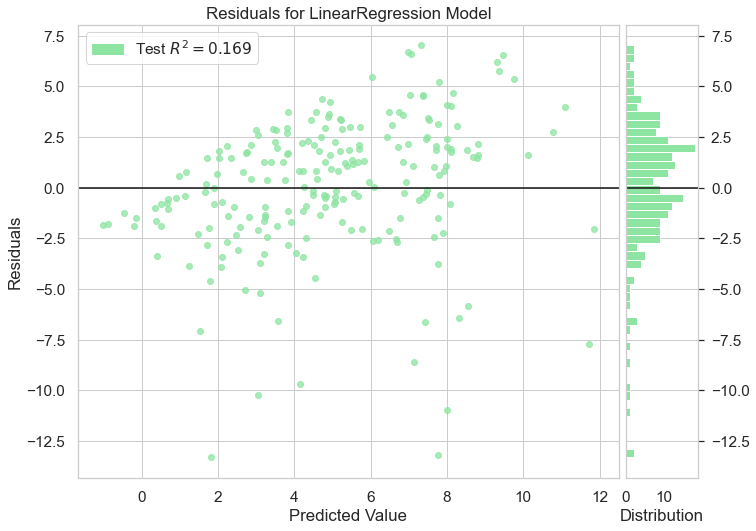

In [26]:

mod = res['model']['reg']
train_X = res['model']['train']['X']
train_y = res['model']['train']['y']
test_X = res['model']['test']['X']
test_y = res['model']['test']['y']

vis = ResidualsPlot(mod, size=(800, 600))
# vis.fit(train_X, train_y)
vis.score(test_X, test_y)
ct.set_style(font_scale=1.4)
vis.show();

In [27]:

from itertools import combinations
combination_size = 3 # Number of predictors to limit model to

print(f"Testing {len(list(combinations(X, combination_size)))} "
        f"possible combinations of {combination_size} predictors.\n{50*'-'}")

"""
Loop through every possible combination of columns, of given size.
Run a regression for each one, and compare the RMSE for the testing group to
the current best we've found, and update it if we find a better model.
"""
lowest_rmse = 1_000_000
best_result = dict()
for cols in combinations(X, combination_size):
    results = run_reg(X, y, cols=list(cols))
    test_rmse = results['metrics'].at['Testing', 'RMSE'] 
    # test_rmse = results['metrics'].at['Testing', 'R_Sq_Adj'] 
    if test_rmse > lowest_rmse:
        lowest_rmse = test_rmse
        best_result = results
    # -----------------------------------------------
    # WARNING: THIS CODE TAKES A FEW MINUTES TO RUN
    # If you just want to move on and can't wait, just leave
    # this break statement in, and run, to get random solution
    # break # Remove this break to find best possible combination

print("Here is the one with lowest RMSE on the Testing data:")
display(best_result['metrics'])
best_result['coef']

Testing 5456 possible combinations of 3 predictors.
--------------------------------------------------
Here is the one with lowest RMSE on the Testing data:


,Intercept,MAE,MSE,RMSE,R_Sq,R_Sq_Adj
Training,-1.36,2.040957,7.731277,2.780517,0.117851,0.035150
Testing,-1.36,1.683655,1.683655,2.279093,0.391972,0.305111


,coef,pvals
race_hispanic_prop,3.399821,0.386948
hu_occ_prop,4.655012,0.007676
hu_blt_2000_plus_prop,8.166132,0.139097


(<Figure size 1440x1440 with 2 Axes>, <AxesSubplot:>)

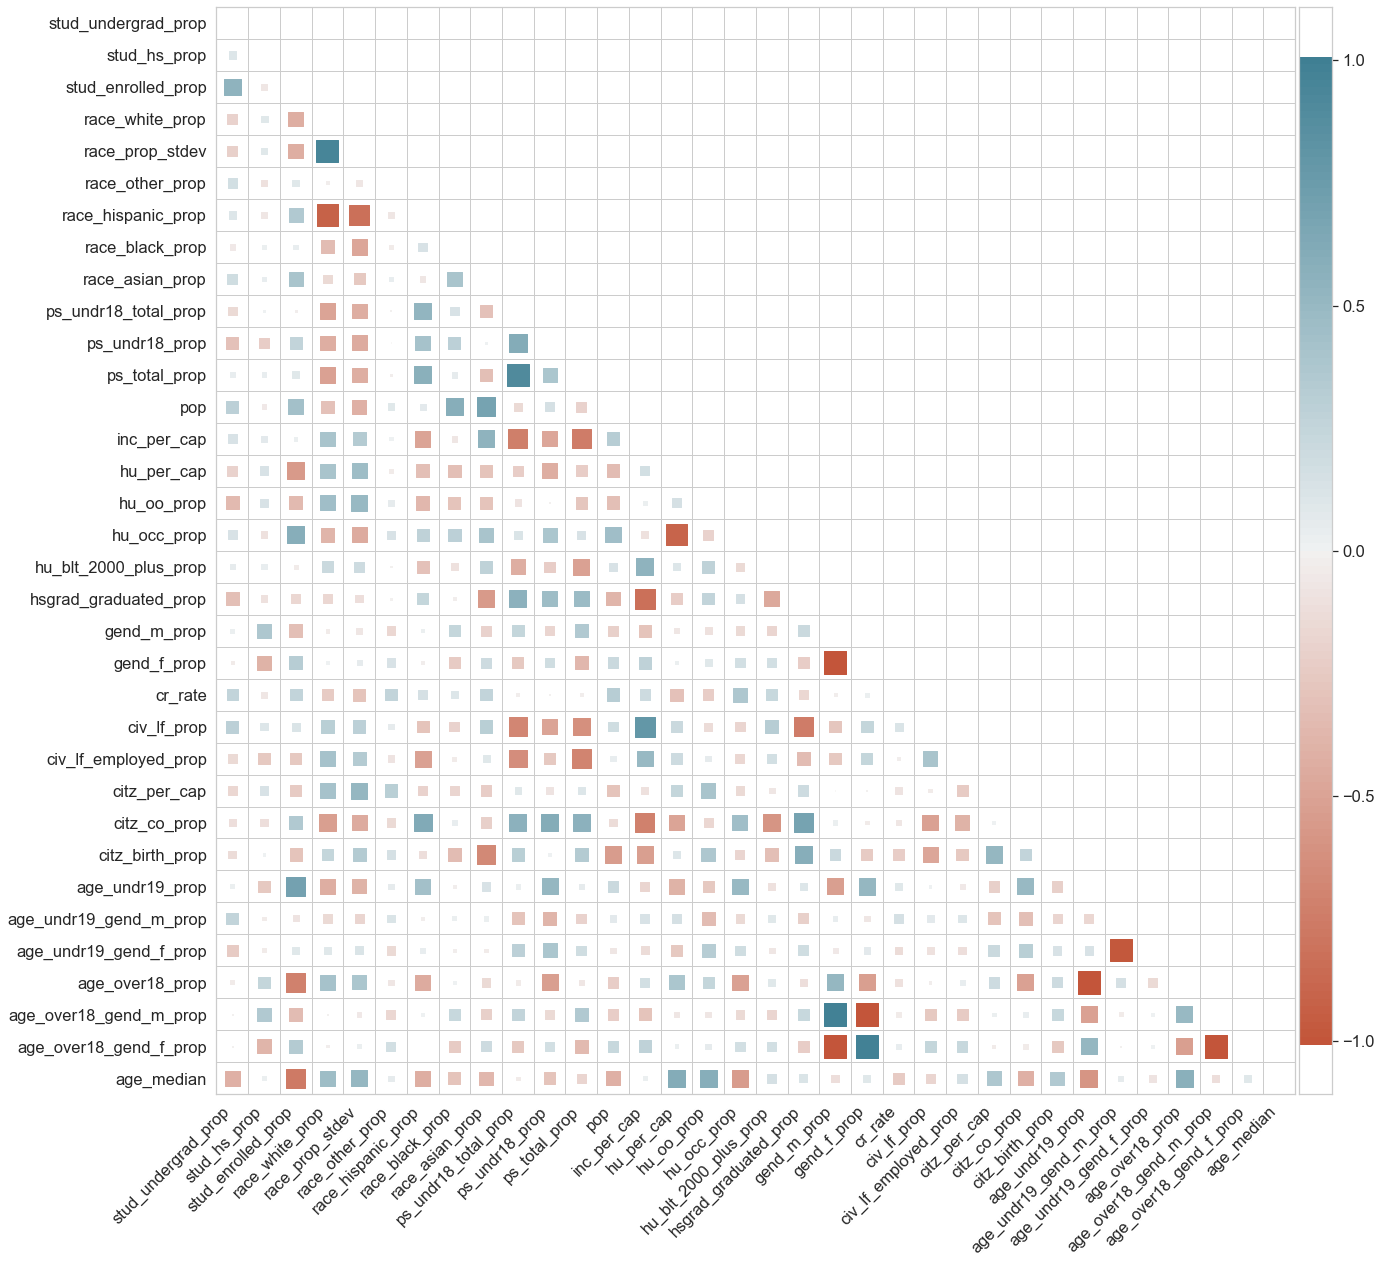

In [28]:
import chart_tools as ct
ct.set_style(20)
ct.superheat(df.corr())

#### _Second Regression:_ Crime & Education datasets for 2012 <a id='3c'></a>

In [29]:
df_linreg2 = df_crime_edu_2012.copy().drop(columns=['year','county','not_a_crime','Unnamed: 0'])

X2 = df_linreg2.drop(columns='count')
Y2 = df_linreg2['count']

KeyError: "['not_a_crime', 'Unnamed: 0'] not found in axis"

In [ ]:
res2 = run_reg(X2, Y2)
display(res2['metrics'])
display(res2['coef'].round(4))

C:\Users\kenda\AppData\Local\Temp\ipykernel_18672\2845488122.py:6: RuntimeWarning: invalid value encountered in sqrt
  standard_error = np.sqrt(np.diagonal(sse * np.linalg.inv(np.dot(X.T, X))))


,Intercept,MAE,MSE,RMSE,R_Sq,R_Sq_Adj
Training,0.38,9.220348e-12,3.484666e-22,1.866726e-11,1.000000,1.000000
Testing,0.38,1.981559e+01,1.981559e+01,5.011911e+01,0.999986,1.000004


,coef,pvals
age_avg,-0.0341,NaN
quarter_mode,0.0130,NaN
month_mode,0.0565,NaN
day_of_week_mode,0.0121,NaN
hour_mode,0.0297,NaN
...,...,...
homeless_graduated,0.0281,NaN
homeless_completed,0.0243,NaN
gifted_grad_base_total,-0.0185,NaN
gifted_graduated,-0.0070,NaN


### _Clustering:_ <a id='3d'></a>

### **Findings and Recommendations**  <a id='4'></a>